Task help reference: https://casa.nrao.edu/docs/TaskRef/

## Measurement set and CASA tables

A measurement set is read as a "file" but is represented as a directory containing "tables" with telescope and observation information. A quick way to inspect the format is to list the unpacked directory

It is customary to refer to CASA measurement sets as "files" with a ".ms" extension

In [1]:
ls exms_cleanband.ms

ANTENNA/           PROCESSOR/        table.f2_TSM0  table.f7
DATA_DESCRIPTION/  SOURCE/           table.f3       table.f7_TSM0
FEED/              SPECTRAL_WINDOW/  table.f3_TSM0  table.f8
FIELD/             STATE/            table.f4       table.f8_TSM0
FLAG_CMD/          table.dat         table.f4_TSM0  table.info
HISTORY/           table.f0          table.f5       table.lock
OBSERVATION/       table.f1          table.f5_TSM0
POINTING/          table.f1_TSM0     table.f6
POLARIZATION/      table.f2          table.f6_TSM0


**Important: Even though you can access the CASA measurement set as a normal directory with files, NEVER change any of the files or directories inside this measurement set (.ms) directory outside of CASA. This will break the expected structure and CASA will be unable to read and process the data.**

Use the `tasklist` command to list available CASA functions.

In [2]:
print casa['build']['version']
tasklist()

5.5.0-149  
Available tasks, organized by category (experimental tasks in parenthesis ()
  deprecated tasks in curly brackets {}).


Import/export       Information         Editing             Manipulation      
------------------  ------------------  ------------------  ------------------
exportasdm          asdmsummary         fixplanets          concat            
exportfits          imhead              fixvis              conjugatevis      
exportuvfits        imreframe           flagcmd             cvel              
importasap          imstat              flagdata            fixvis            
importasdm          imval               flagmanager         hanningsmooth     
importatca          listcal             msview              imhead            
importfits          listfits            plotms              mstransform       
importfitsidi       listhistory                             oldstatwt         
importmiriad        listobs                                 partition        

## Inspecting the Data

In [3]:
msfile='exms_cleanband.ms'

A CASA measurement set contains not only the data of the observation, but also metadata about the observatory, as well as additional info related to the observation that is needed to analyse and calibrate the data. This information can be viewed (compare the output with the `katdal` header display):

List the observation sequence   
This is very useful for the initial investigation using `plotms` described below.

In [4]:
listobs(vis=msfile)

           MeasurementSet Name:  /home/jupyter/MeerKAT-Cookbook/casa/exms_cleanband.ms      MS Version 2
   Observer: Lindsay     Project: 20190125-0012  
Observation: MeerKAT
Data records: 150       Total elapsed time = 199.915 seconds
   Observed from   25-Jan-2019/12:05:00.4   to   25-Jan-2019/12:08:20.3 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  25-Jan-2019/12:05:00.4 - 12:08:20.3     1      0 PKS1934-63                 150  [0]  [8] [UNKNOWN]
           (nRows = Total number of rows per scan) 
Fields: 1
  ID   Code Name                RA               Decl           Epoch   SrcId      nRows
  0    T    PKS1934-63          19:39:25.030000 -63.42.45.70000 J2000   0            150
Spectral Windows:  (1 unique spectral windows and 1 unique polarization setups)
  SpwID  Name   #Chans   Frame   Ch0(MHz)  ChanWid(kHz)  TotBW(kHz) CtrFreq(MHz)  Corrs        

True

Show log 2019-06-20 09:39:17	INFO	listobs::::	
 2019-06-20 09:39:17	INFO	listobs::::+	##########################################
 2019-06-20 09:39:17	INFO	listobs::::+	##### Begin Task: listobs #####
 2019-06-20 09:39:17	INFO	listobs::::	listobs(vis="exms_cleanband.ms",selectdata=True,spw="",field="",antenna="",
 2019-06-20 09:39:17	INFO	listobs::::+ uvrange="",timerange="",correlation="",scan="",intent="",
 2019-06-20 09:39:17	INFO	listobs::::+ feed="",array="",observation="",verbose=True,listfile="casapy_temp.txt",
 2019-06-20 09:39:17	INFO	listobs::::+ listunfl=False,cachesize=50,overwrite=True)
 2019-06-20 09:39:17	INFO	listobs::ms::summary	Writing output to file: casapy_temp.txt
 2019-06-20 09:39:17	INFO	listobs::MSMetaData::_computeScanAndSubScanProperties Computing scan and subscan properties...
 2019-06-20 09:39:17	INFO	listobs::::	##### End Task: listobs #####
 2019-06-20 09:39:17	INFO	listobs::::+	##########################################

Useful information: targets (fields) observed, and in which spectral windows (Spw). Whether the observation contains a single setup or various spectral resolutions: number channels, total bandwidth, center frequency, correlator product per spectral window. As well as, number of antennas and which antennas was used.

Firstly, try to identify which sources are calibrators and which are targets. This will be indicated in the science proposal, but can also be inferred from the targets. Flux and bandpass calibrators will have only a few observations, gain/phase calibrators will be intermittent with the science observations, but will be observed for shorter intervals and will typically be within 15 degrees of a science target. For flux and bandpass calibrators, only verify that they were up some time during the observation (if more than one select the best one to use). For gain calibrators it is a little more complex, select a calibrator close (approx 15 to 10 degrees) to the target and apply that calibration solution to the target.

If the measurement set was converted from a MeerKAT observation, the observation header display can be used to identify the relevant targets using the `tags` assigned: `gaincal` for complex gain calibrator, `fluxcal` for flux calibrator and `bpcal` for bandpass calibrator

In [5]:
target = 'PKS1934-63'
ref_ant = 'm043'

For consistency specify the reference antenna as selected in the `mvftoms.py` conversion

Number of points being plotted: 4


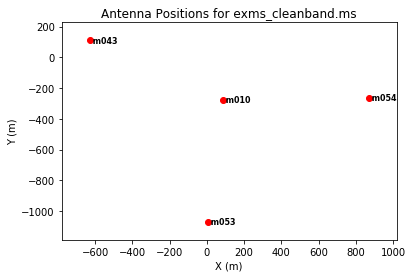

Show log 2019-06-20 09:39:24	INFO	plotants::::	
 2019-06-20 09:39:24	INFO	plotants::::+	##########################################
 2019-06-20 09:39:24	INFO	plotants::::+	##### Begin Task: plotants #####
 2019-06-20 09:39:24	INFO	plotants::::	plotants(vis="exms_cleanband.ms",figfile="",antindex=False,logpos=False,exclude="",
 2019-06-20 09:39:24	INFO	plotants::::+ checkbaselines=False,title="",showgui=True)
 2019-06-20 09:39:24	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on exms_cleanband.ms...
 2019-06-20 09:39:24	INFO	plotants::::	Number of points being plotted: 4
 2019-06-20 09:39:24	INFO	plotants::::	##### End Task: plotants #####
 2019-06-20 09:39:24	INFO	plotants::::+	##########################################

In [7]:
# antenna positions
plotants(vis=msfile)

There may be a few bad points, RFI or system related issues that will affect the calibration and data analysis. It is generally a good idea to spend a little time simply looking at your data before doing anything.

Look for bad antennas, persistently bad channels across all spectral windows, and other clear outliers.  

Once bad data has been identified, it must be flagged out to improve results.   
**Note: initial inspection and flagging are only done using your calibrators, NEVER use the science targets. These will be inspected and flagged after calibration.**

https://casa.nrao.edu/docs/TaskRef/plotms-task.html

Use the `plotms` command and the display window to look at your data from various angles, such as amp/phase vs time/frequency/channel and iterate over antenna/baseline. You can also apply some averaging to get less noisy displays. Usually the best approach is to make several passes through the data using various plotting and listing tools. **During this initial investigation you are only looking at the data, not flagging!** You need to identify bad antennas, baselines and only select those channels that have such persistent, bad outliers that it could skew the calibration results.    

Since calibrator sources are generally point-like, their true visibility amplitude is independent of baseline and time, and the phase should be 0 deg. The data for the initial investigation is uncalibrated, but for point-like sources the uncalibrated visibility amplitude on all baselines should be approximately the same, and the uncalibrated visibility phases should be fairly stable, although not necessarily close to 0 deg.

Good advice is to start with a bandpass (primary) calibrator for inspection. Then confirm bad antenna and channel behaviour using the phase (secondary) calibrators.

Remember: The bandpass (primary) calibrator is a point source that is very stable and well known.

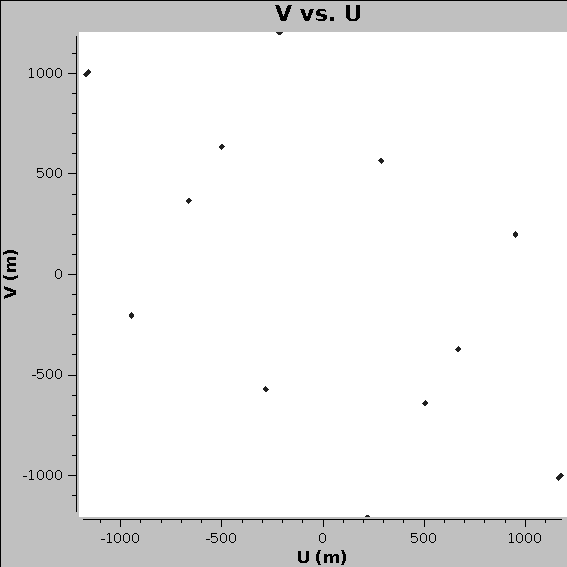

True

Show log 2019-06-20 09:39:27	INFO	plotms::::	
 2019-06-20 09:39:27	INFO	plotms::::+	##########################################
 2019-06-20 09:39:27	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:39:27	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:39:27	INFO	plotms::::+ plotindex=0,xaxis="u",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:39:27	INFO	plotms::::+ yaxis="v",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:39:27	INFO	plotms::::+ selectdata=True,field="",spw="0",timerange="",uvrange="",
 2019-06-20 09:39:27	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-06-20 09:39:27	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:39:27	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:39:27	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:39:27	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:39:27	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:39:27	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:39:27	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:39:27	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:39:27	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:39:27	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:39:27	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:39:27	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:39:27	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:39:27	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:39:27	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:39:29	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:39:29	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	START Current memory usage: 2184.89 kilobytes.
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:39:29	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Caching for the new plot: V(31) vs. U(30)...
 2019-06-20 09:39:29	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:39:30	INFO	PlotMS::load_cache	Data selection will yield a total of 600600 plottable points (flagged and unflagged).
 2019-06-20 09:39:30	INF

In [8]:
plotms(vis=msfile,xaxis='u', yaxis='v', field='', spw='0', ydatacolumn='', coloraxis='field', correlation='')

### Antenna specific

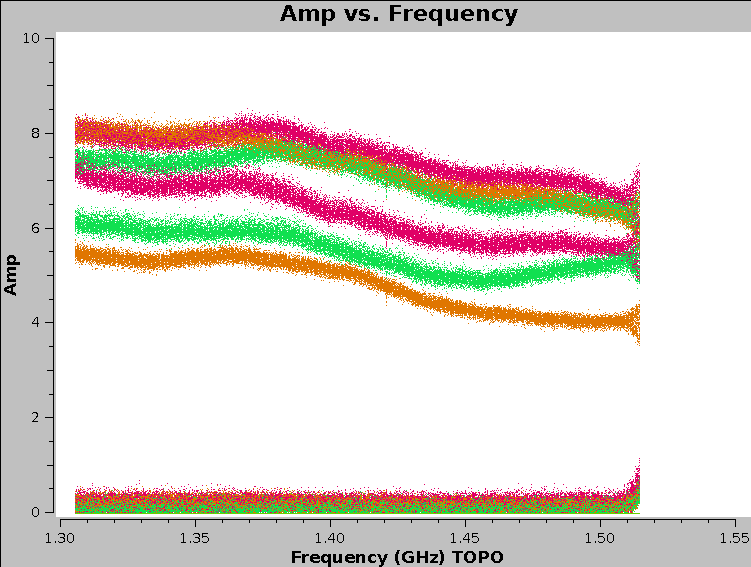

True

Show log 2019-06-20 09:39:40	INFO	plotms::::	
 2019-06-20 09:39:40	INFO	plotms::::+	##########################################
 2019-06-20 09:39:40	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:39:40	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:39:40	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:39:40	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:39:40	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:39:40	INFO	plotms::::+ antenna="m010,m043,m053",scan="",correlation="",array="",observation="",
 2019-06-20 09:39:40	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:39:40	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:39:40	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:39:40	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:39:40	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:39:40	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:39:40	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:39:40	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:39:40	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:39:40	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:39:40	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:39:40	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:39:40	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:39:40	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:39:40	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:39:40	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	START Current memory usage: 5499.19 kilobytes.
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:39:40	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-06-20 09:39:40	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:39:41	INFO	PlotMS::load_cache	Data selection will yield a total of 600600 plottable points (flagged and unflagged).
 2019-06-20 09:39:41	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0039068 GB of memory (6.50483 bytes/point).
 2019-06-20 09:39:41	INFO	PlotMS::load_cache+	This is 0.0239486% of the me

In [9]:
plotms(vis=msfile, xaxis='freq', yaxis='amp', field=target, coloraxis='baseline', antenna='m010,m043,m053')

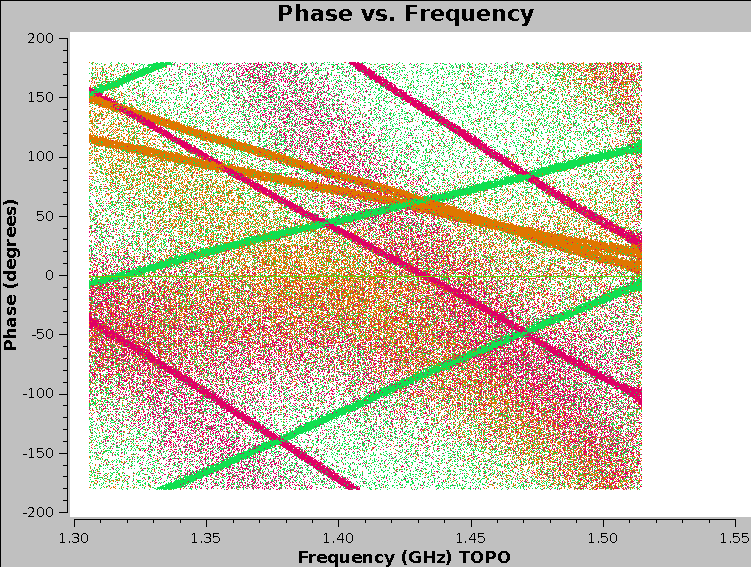

True

Show log 2019-06-20 09:39:46	INFO	plotms::::	
 2019-06-20 09:39:46	INFO	plotms::::+	##########################################
 2019-06-20 09:39:46	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:39:46	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:39:46	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:39:46	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:39:46	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:39:46	INFO	plotms::::+ antenna="m010,m043,m053",scan="",correlation="",array="",observation="",
 2019-06-20 09:39:46	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:39:46	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:39:46	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:39:46	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:39:46	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:39:46	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:39:46	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:39:46	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:39:46	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:39:46	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:39:46	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:39:46	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:39:46	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:39:46	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:39:46	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:39:46	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	START Current memory usage: 5539.84 kilobytes.
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:39:46	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Frequency(6)...
 2019-06-20 09:39:46	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:39:47	INFO	PlotMS::load_cache	Data selection will yield a total of 600600 plottable points (flagged and unflagged).
 2019-06-20 09:39:47	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0039068 GB of memory (6.50483 bytes/point).
 2019-06-20 09:39:47	INFO	PlotMS::load_cache+	This is 0.0239486% of th

In [10]:
plotms(vis=msfile, xaxis='freq', yaxis='phase', field=target, coloraxis='baseline', antenna='m010,m043,m053')

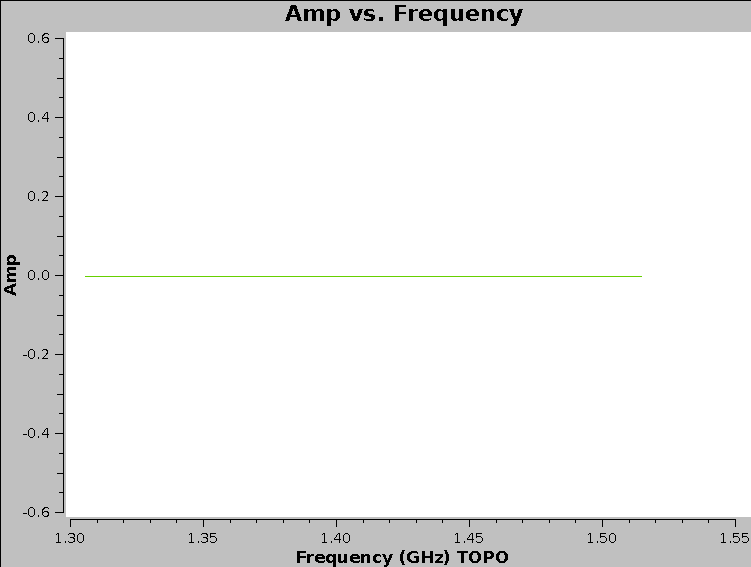

True

Show log 2019-06-20 09:39:53	INFO	plotms::::	
 2019-06-20 09:39:53	INFO	plotms::::+	##########################################
 2019-06-20 09:39:53	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:39:53	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:39:53	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:39:53	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:39:53	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:39:53	INFO	plotms::::+ antenna="m054",scan="",correlation="",array="",observation="",
 2019-06-20 09:39:53	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:39:53	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:39:53	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:39:53	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:39:53	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:39:53	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:39:53	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:39:53	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:39:53	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:39:53	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:39:53	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:39:53	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:39:53	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:39:53	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:39:53	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:39:53	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	START Current memory usage: 5551.62 kilobytes.
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:39:53	INFO	PlotMS::load_cache	Data selection will yield a total of 300300 plottable points (flagged and unflagged).
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0021041 GB of memory (7.00666 bytes/point).
 2019-06-20 09:39:53	INFO	PlotMS::load_cache+	This is 0.0128981% of the memory avail

In [11]:
plotms(vis=msfile, xaxis='freq', yaxis='amp', field=target, coloraxis='baseline', antenna='m054')

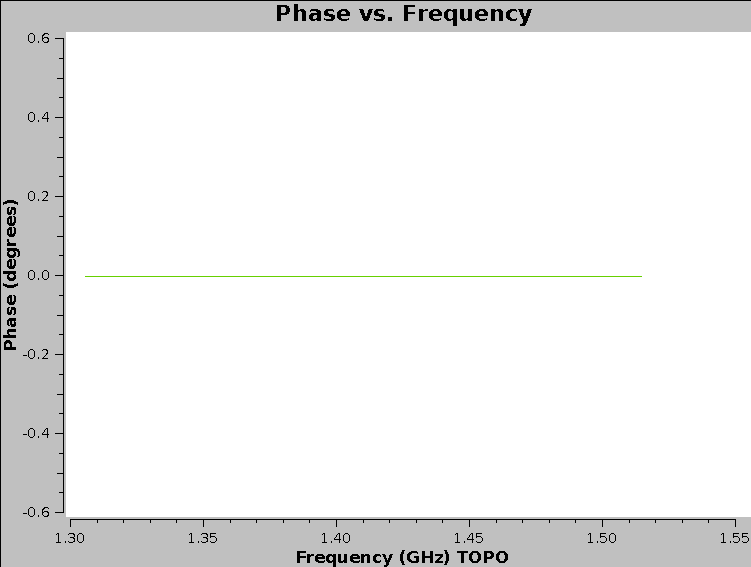

True

Show log 2019-06-20 09:39:57	INFO	plotms::::	
 2019-06-20 09:39:57	INFO	plotms::::+	##########################################
 2019-06-20 09:39:57	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:39:57	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:39:57	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:39:57	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:39:57	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:39:57	INFO	plotms::::+ antenna="m054",scan="",correlation="",array="",observation="",
 2019-06-20 09:39:57	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:39:57	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:39:57	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:39:57	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:39:57	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:39:57	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:39:57	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:39:57	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:39:57	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:39:57	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:39:57	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:39:57	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:39:57	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:39:57	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:39:57	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:39:57	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	START Current memory usage: 5564.62 kilobytes.
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Frequency(6)...
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:39:57	INFO	PlotMS::load_cache	Data selection will yield a total of 300300 plottable points (flagged and unflagged).
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0021041 GB of memory (7.00666 bytes/point).
 2019-06-20 09:39:57	INFO	PlotMS::load_cache+	This is 0.0128981% of the memory a

In [12]:
plotms(vis=msfile, xaxis='freq', yaxis='phase', field=target, coloraxis='baseline', antenna='m054')

**Data from antenna `m054` is suspect and the antenna should be flagged out**

### Phase
Phase can vary both with time and channel -- since it is hard to determine the phase stability by looking at all channels and over time simultaneously, consider each separately

**"Slice" in time -- look at one scan, but all channels**
* Look at phase as a function of frequency on a per-baseline basis -- using a strong calibrator
* Pick an observation from listobs output

When using CASA from the command line, better visualisation may be available than from the notebook. So once you are comfortable with the processing introduced here, use `plotms` from CASA in a terminal
```
plotms(vis=msfile, xaxis='channel', yaxis='phase', correlation='XX,YY', scan='28', field='PKS1934-638', iteraxis='baseline', coloraxis='corr', plotrange=[0,0,-180,180])
```

Stepping through the baselines -- identify channels with persistent, very strong RFI. Especially if the phases for both XX and YY show consistent plots with data points close together. (Note: the pre-flagged data using h5toms is considerably cleaner from large spikes than the unflagged data, but some high points in suspect channels did survive.)

If you have multiple scans in the observation, page through all the scans of this source and identify other persistent, strong RFI. Continue to do this until you have inspected a good sample of your data.

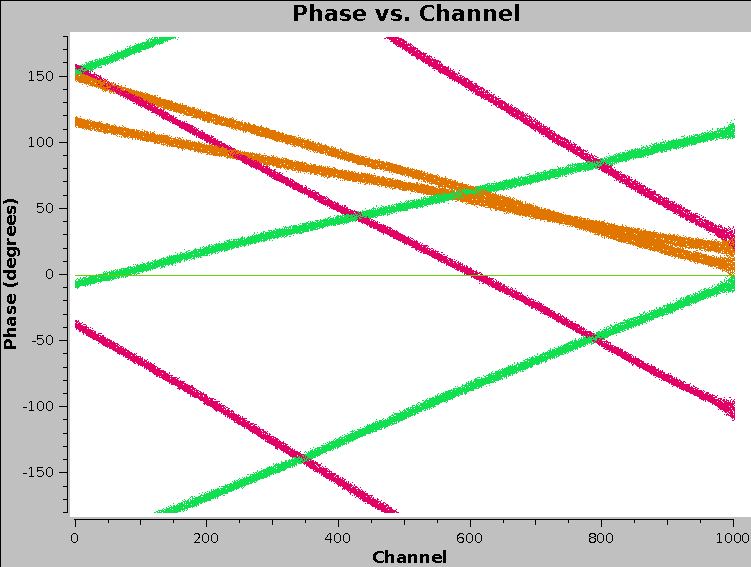

True

Show log 2019-06-20 09:40:04	INFO	plotms::::	
 2019-06-20 09:40:04	INFO	plotms::::+	##########################################
 2019-06-20 09:40:04	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:40:04	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:40:04	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:40:04	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:40:04	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:40:04	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-06-20 09:40:04	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:40:04	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:40:04	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:40:04	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:40:04	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:40:04	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:40:04	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:40:04	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:40:04	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:40:04	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:40:04	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:40:04	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:40:04	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:40:04	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:40:04	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:40:05	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	START Current memory usage: 5573.86 kilobytes.
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Channel(5)...
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:40:05	INFO	PlotMS::load_cache	Data selection will yield a total of 300300 plottable points (flagged and unflagged).
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0021048 GB of memory (7.00899 bytes/point).
 2019-06-20 09:40:05	INFO	PlotMS::load_cache+	This is 0.0129024

In [13]:
plotms(vis=msfile, xaxis='channel', yaxis='phase', correlation='XX,YY', field=target, coloraxis='baseline', plotrange=[0,0,-180,180])

**"Slice in frequency" -- look at only one channel but at all times**
Check phase stability against time
```
plotms(vis=msfile, xaxis='time', yaxis='phase', correlation='XX,YY', spw='*:9', field='PKS1934-638', iteraxis='baseline', coloraxis='corr', plotrange=[0,0,-180,180])
```

Where `spw='*:9'` plots the data for all spectral windows (just one = 0) and only for channel 9.
Select a number of channels through the range and view display.

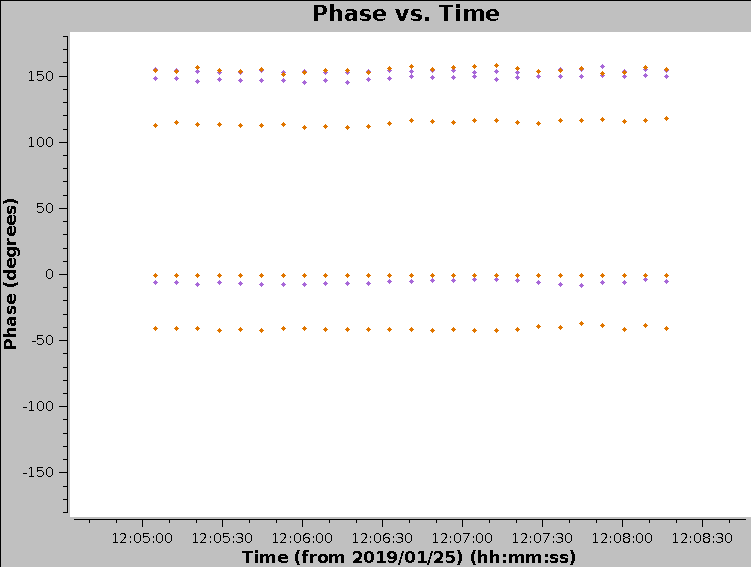

True

Show log 2019-06-20 09:40:13	INFO	plotms::::	
 2019-06-20 09:40:13	INFO	plotms::::+	##########################################
 2019-06-20 09:40:13	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:40:13	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:40:13	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:40:13	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:40:13	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="*:9",timerange="",uvrange="",
 2019-06-20 09:40:13	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-06-20 09:40:13	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:40:13	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:40:13	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:40:13	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:40:13	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:40:13	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:40:13	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:40:13	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:40:13	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:40:13	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:40:13	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:40:13	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:40:13	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:40:13	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:40:13	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:40:13	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	START Current memory usage: 5586.73 kilobytes.
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Time(2)...
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:40:13	INFO	PlotMS::load_cache	Data selection will yield a total of 300 plottable points (flagged and unflagged).
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 4.8e-06 GB of memory (16 bytes/point).
 2019-06-20 09:40:13	INFO	PlotMS::load_cache+	This is 2.94239e-05% of the memory

In [14]:
plotms(vis=msfile, xaxis='time', yaxis='phase', correlation='XX,YY', spw='*:9', field=target, coloraxis='corr', plotrange=[0,0,-180,180])

Uncalibrated phases for point-like calibrator sources do not have to be close to 0 deg, but should be fairly stable over time.

## Flagging the Data

Bad data must be flagged out to improve imaging:
* for calibrator sources -- bad data for the calibrator sources should ideally be removed before determining the calibration solutions
* for other sources -- generally easier to identify bad data after the calibration is applied.

If possible flag either all visibilities for some time interval, or all by antenna, rather than flagging individual baselines! RFI are channel specific and may not appear in all datasets, these channels has to be flagged on a per baseline basis.

Note: If you flag data from calibrator sources associated with the solution for a target source, remove the data from the target sources as well, since the data section cannot be calibrated.

Automated flagging for shadowing, elevations below 15 degrees and extreme outliers:

In [15]:
flagdata(vis=msfile,
         mode='shadow')
# if a Leap second warning is raised, simply run the command again to get rid of the warning

{}

Show log 2019-06-20 09:40:21	INFO	flagdata::::	
 2019-06-20 09:40:21	INFO	flagdata::::+	##########################################
 2019-06-20 09:40:21	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-06-20 09:40:21	INFO	flagdata::::	flagdata(vis="exms_cleanband.ms",mode="shadow",autocorr=False,inpfile="",reason="any",
 2019-06-20 09:40:21	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-06-20 09:40:21	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-06-20 09:40:21	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-06-20 09:40:21	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-06-20 09:40:21	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-06-20 09:40:21	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-06-20 09:40:21	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-06-20 09:40:21	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-06-20 09:40:21	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-06-20 09:40:21	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-06-20 09:40:21	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-06-20 09:40:21	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-06-20 09:40:21	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-06-20 09:40:21	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-06-20 09:40:21	INFO	flagdata::::+ writeflags=True)
 2019-06-20 09:40:21	INFO	flagdata::::	Backup original flags before applying new flags
 2019-06-20 09:40:21	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:21	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_9
 2019-06-20 09:40:21	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:21	INFO	flagdata::::	Shadow mode is active
 2019-06-20 09:40:21	INFO	flagdata::::	Initializing the agents
 2019-06-20 09:40:21	INFO	Shadow::setAgentParameters tolerance is 0 meters 
 2019-06-20 09:40:21	INFO	Shadow::setAgentParameters addantenna is 
 2019-06-20 09:40:21	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-06-20 09:40:21	INFO	flagdata::::	Running the agentflagger tool
 2019-06-20 09:40:22	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-06-20 09:40:22	INFO	FlagMSHandler::	Chunk = 1 [progress: 100%], Observation = 0, Array = 0, Scan = 1, Field = 0 (PKS1934-63), Spw = 0, Channels = 1001, Corrs = [ XX XY YX YY ], Total Rows = 150
 2019-06-20 09:40:22	INFO	FlagMSHandler::nextChunk ==================================================================================== 
 2019-06-20 09:40:22	INFO	AgentFlagger::run	=> Writing flags to the MS
 2019-06-20 09:40:22	INFO	flagdata::::	CASA Version 5.5.0-149 
 2019-06-20 09:40:22	INFO	flagdata::::	
 2019-06-20 09:40:22	INFO	flagdata::::	##### End Task: flagdata #####
 2019-06-20 09:40:22	INFO	flagdata::::+	##########################################

In [16]:
flagdata(vis=msfile,
         mode='elevation',
         lowerlimit = 15)

{}

Show log 2019-06-20 09:40:22	INFO	flagdata::::	
 2019-06-20 09:40:22	INFO	flagdata::::+	##########################################
 2019-06-20 09:40:22	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-06-20 09:40:22	INFO	flagdata::::	flagdata(vis="exms_cleanband.ms",mode="elevation",autocorr=False,inpfile="",reason="any",
 2019-06-20 09:40:22	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-06-20 09:40:22	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-06-20 09:40:22	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-06-20 09:40:22	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-06-20 09:40:22	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-06-20 09:40:22	INFO	flagdata::::+ lowerlimit=15,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-06-20 09:40:22	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-06-20 09:40:22	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-06-20 09:40:22	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-06-20 09:40:22	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-06-20 09:40:22	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-06-20 09:40:22	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-06-20 09:40:22	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-06-20 09:40:22	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-06-20 09:40:22	INFO	flagdata::::+ writeflags=True)
 2019-06-20 09:40:22	INFO	flagdata::::	Backup original flags before applying new flags
 2019-06-20 09:40:22	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:22	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_10
 2019-06-20 09:40:23	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:23	INFO	flagdata::::	Elevation mode is active
 2019-06-20 09:40:23	INFO	flagdata::::	Initializing the agents
 2019-06-20 09:40:23	INFO	Elevation::setAgentParameters lowerlimit is 15
 2019-06-20 09:40:23	INFO	Elevation::setAgentParameters upperlimit is 90
 2019-06-20 09:40:23	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-06-20 09:40:23	INFO	flagdata::::	Running the agentflagger tool
 2019-06-20 09:40:23	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-06-20 09:40:23	INFO	FlagMSHandler::	Chunk = 1 [progress: 100%], Observation = 0, Array = 0, Scan = 1, Field = 0 (PKS1934-63), Spw = 0, Channels = 1001, Corrs = [ XX XY YX YY ], Total Rows = 150
 2019-06-20 09:40:23	INFO	FlagMSHandler::nextChunk ==================================================================================== 
 2019-06-20 09:40:23	INFO	AgentFlagger::run	=> Writing flags to the MS
 2019-06-20 09:40:23	INFO	flagdata::::	CASA Version 5.5.0-149 
 2019-06-20 09:40:23	INFO	flagdata::::	
 2019-06-20 09:40:23	INFO	flagdata::::	##### End Task: flagdata #####
 2019-06-20 09:40:23	INFO	flagdata::::+	##########################################

In [17]:
flagdata(vis=msfile,
         mode='clip',
         clipminmax = [1e-5, 1000.0]);

Show log 2019-06-20 09:40:23	INFO	flagdata::::	
 2019-06-20 09:40:23	INFO	flagdata::::+	##########################################
 2019-06-20 09:40:23	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-06-20 09:40:23	INFO	flagdata::::	flagdata(vis="exms_cleanband.ms",mode="clip",autocorr=False,inpfile="",reason="any",
 2019-06-20 09:40:23	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-06-20 09:40:23	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-06-20 09:40:23	INFO	flagdata::::+ observation="",feed="",clipminmax=[1e-05, 1000.0],datacolumn="DATA",clipoutside=True,
 2019-06-20 09:40:23	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-06-20 09:40:23	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-06-20 09:40:23	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-06-20 09:40:23	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-06-20 09:40:23	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-06-20 09:40:23	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-06-20 09:40:23	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-06-20 09:40:23	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-06-20 09:40:23	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-06-20 09:40:23	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-06-20 09:40:23	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-06-20 09:40:23	INFO	flagdata::::+ writeflags=True)
 2019-06-20 09:40:23	INFO	flagdata::::	Backup original flags before applying new flags
 2019-06-20 09:40:23	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:23	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_11
 2019-06-20 09:40:24	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:24	INFO	flagdata::::	Clip mode is active
 2019-06-20 09:40:24	INFO	flagdata::::	Initializing the agents
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters data column is DATA
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters Visibility expression is ABS XX,XY,YX,YY
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters clipzeros is 0
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters clipoutside is 1
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters clipmin is 1e-05
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters clipmax is 1000
 2019-06-20 09:40:24	INFO	Clip::setAgentParameters Clipping outside [1e-05,1000], plus NaNs
 2019-06-20 09:40:24	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-06-20 09:40:24	INFO	flagdata::::	Running the agentflagger tool
 2019-06-20 09:40:24	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-06-20 09:40:24	INFO	FlagMSHandler::	Chunk = 1 [progress: 100%], Observation = 0, Array = 0, Scan = 1, Field = 0 (PKS1934-63), Spw = 0, Channels = 1001, Corrs = [ XX XY YX YY ], Total Rows = 150
 2019-06-20 09:40:24	INFO	Clip::chunkSummary	=> Data flagged so far 50%
 2019-06-20 09:40:24	INFO	FlagMSHandler::nextChunk ==================================================================================== 
 2019-06-20 09:40:24	INFO	Clip::tableSummary	=> Percentage of data flagged in table selection: 50%
 2019-06-20 09:40:24	INFO	AgentFlagger::run	=> Writing flags to the MS
 2019-06-20 09:40:24	INFO	flagdata::::	CASA Version 5.5.0-149 
 2019-06-20 09:40:24	INFO	flagdata::::	
 2019-06-20 09:40:24	INFO	flagdata::::	##### End Task: flagdata #####
 2019-

In [18]:
# only for continuum sources (imaging)
flagdata(vis=msfile,
         mode='clip',
         field='',
         clipzeros=True,
         flagbackup=False);

Show log 2019-06-20 09:40:25	INFO	flagdata::::	
 2019-06-20 09:40:25	INFO	flagdata::::+	##########################################
 2019-06-20 09:40:25	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-06-20 09:40:25	INFO	flagdata::::	flagdata(vis="exms_cleanband.ms",mode="clip",autocorr=False,inpfile="",reason="any",
 2019-06-20 09:40:25	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-06-20 09:40:25	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-06-20 09:40:25	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-06-20 09:40:25	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=True,
 2019-06-20 09:40:25	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-06-20 09:40:25	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-06-20 09:40:25	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-06-20 09:40:25	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-06-20 09:40:25	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-06-20 09:40:25	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-06-20 09:40:25	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-06-20 09:40:25	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-06-20 09:40:25	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-06-20 09:40:25	INFO	flagdata::::+ flagbackup=False,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-06-20 09:40:25	INFO	flagdata::::+ writeflags=True)
 2019-06-20 09:40:25	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:25	INFO	flagdata::::	Clip mode is active
 2019-06-20 09:40:25	INFO	flagdata::::	Initializing the agents
 2019-06-20 09:40:25	INFO	Clip::setAgentParameters data column is DATA
 2019-06-20 09:40:25	INFO	Clip::setAgentParameters Visibility expression is ABS XX,XY,YX,YY
 2019-06-20 09:40:25	INFO	Clip::setAgentParameters clipzeros is 1
 2019-06-20 09:40:25	INFO	Clip::setAgentParameters clipoutside is 1
 2019-06-20 09:40:25	INFO	Clip::setAgentParameters clipminmax range not provided
 2019-06-20 09:40:25	INFO	Clip::setAgentParameters Clipping range not provided, clipping NaNs and zeros
 2019-06-20 09:40:25	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-06-20 09:40:25	INFO	flagdata::::	Running the agentflagger tool
 2019-06-20 09:40:25	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-06-20 09:40:25	INFO	FlagMSHandler::	Chunk = 1 [progress: 100%], Observation = 0, Array = 0, Scan = 1, Field = 0 (PKS1934-63), Spw = 0, Channels = 1001, Corrs = [ XX XY YX YY ], Total Rows = 150
 2019-06-20 09:40:25	INFO	Clip::chunkSummary	=> Data flagged so far 50%
 2019-06-20 09:40:25	INFO	FlagMSHandler::nextChunk ==================================================================================== 
 2019-06-20 09:40:25	INFO	Clip::tableSummary	=> Percentage of data flagged in table selection: 50%
 2019-06-20 09:40:25	INFO	AgentFlagger::run	=> Writing flags to the MS
 2019-06-20 09:40:25	INFO	flagdata::::	CASA Version 5.5.0-149 
 2019-06-20 09:40:25	INFO	flagdata::::	
 2019-06-20 09:40:25	INFO	flagdata::::	##### End Task: flagdata #####
 2019-06-20 09:40:25	INFO	flagdata::::+	##########################################

If possible flag either all visibilities for some time interval, or all by antenna, rather than flagging individual baselines!    
RFI are channel specific and may not appear in all data sets, these channels has to be flagged on a per baseline basis.

In [19]:
flagdata(vis=msfile,
         antenna='m054');

Show log 2019-06-20 09:40:37	INFO	flagdata::::	
 2019-06-20 09:40:37	INFO	flagdata::::+	##########################################
 2019-06-20 09:40:37	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-06-20 09:40:37	INFO	flagdata::::	flagdata(vis="exms_cleanband.ms",mode="manual",autocorr=False,inpfile="",reason="any",
 2019-06-20 09:40:37	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="m054",uvrange="",
 2019-06-20 09:40:37	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-06-20 09:40:37	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-06-20 09:40:37	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-06-20 09:40:37	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-06-20 09:40:37	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-06-20 09:40:37	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-06-20 09:40:37	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-06-20 09:40:37	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-06-20 09:40:37	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-06-20 09:40:37	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-06-20 09:40:37	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-06-20 09:40:37	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-06-20 09:40:37	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-06-20 09:40:37	INFO	flagdata::::+ writeflags=True)
 2019-06-20 09:40:37	INFO	flagdata::::	Backup original flags before applying new flags
 2019-06-20 09:40:37	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:37	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_12
 2019-06-20 09:40:37	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-06-20 09:40:37	INFO	flagdata::::	Manual mode is active
 2019-06-20 09:40:37	INFO	flagdata::::	Initializing the agents
 2019-06-20 09:40:37	INFO	Manual::setAgentParameters autocorr is 0
 2019-06-20 09:40:37	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-06-20 09:40:37	INFO	flagdata::::	Running the agentflagger tool
 2019-06-20 09:40:37	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-06-20 09:40:37	INFO	FlagMSHandler::	Chunk = 1 [progress: 100%], Observation = 0, Array = 0, Scan = 1, Field = 0 (PKS1934-63), Spw = 0, Channels = 1001, Corrs = [ XX XY YX YY ], Total Rows = 75
 2019-06-20 09:40:37	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-06-20 09:40:37	INFO	FlagMSHandler::nextChunk ==================================================================================== 
 2019-06-20 09:40:37	INFO	Manual::tableSummary	=> Percentage of data flagged in table selection: 100%
 2019-06-20 09:40:37	INFO	AgentFlagger::run	=> Writing flags to the MS
 2019-06-20 09:40:37	INFO	flagdata::::	CASA Version 5.5.0-149 
 2019-06-20 09:40:37	INFO	flagdata::::	
 2019-06-20 09:40:37	INFO	flagdata::::	##### End Task: flagdata #####
 2019-06-20 09:40:37	INFO	flagdata::::+	##########################################

For the initial flagging the best approach is usually to first make several passes through the data of the observed calibrator sources, using various plotting and listing tools, to identify the bad data. Once you have identified some sections of bad data, flag them out explicitly using flagdata.

### Inspection after flagging

Viewing amplitude vs channel will show the passband for each target very clearly.

For calibrator sources we expect values that are consistent across baselines and vary only slightly across channels. Thus plot amplitude for all baseline together.   
Bandpass calibrator must have fairly stable amplitude over time.

```
plotms(vis=msfile, xaxis='time', yaxis='amp', averagedata=T, avgchannel='3072', coloraxis='field', iteraxis='spw')
```

`avgchannel`: Number of channels to average over, by choosing a value $\geq$ number of channels, data will be averaged over all channels

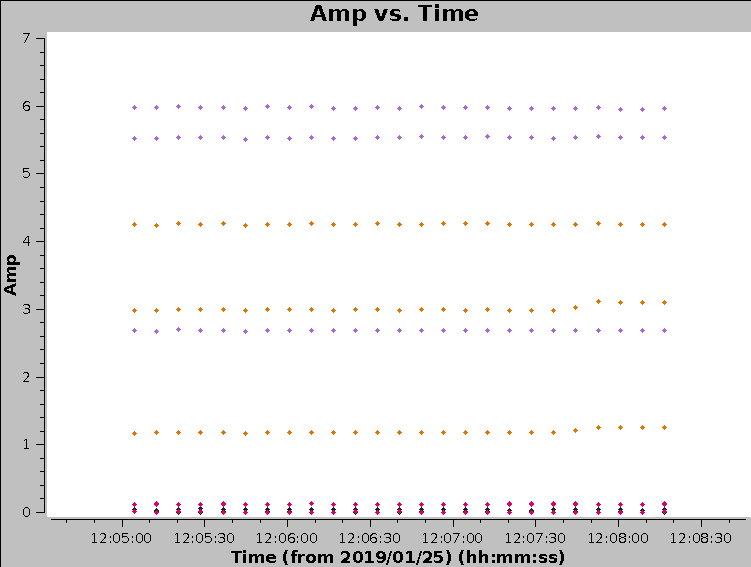

True

Show log 2019-06-20 09:40:43	INFO	plotms::::	
 2019-06-20 09:40:43	INFO	plotms::::+	##########################################
 2019-06-20 09:40:43	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:40:43	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:40:43	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:40:43	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:40:43	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:40:43	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-06-20 09:40:43	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="3072",
 2019-06-20 09:40:43	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:40:43	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:40:43	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:40:43	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:40:43	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:40:43	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:40:43	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:40:43	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:40:43	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:40:43	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:40:43	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:40:43	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:40:43	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:40:43	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:40:43	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	START Current memory usage: 5609.61 kilobytes.
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Data Averaging: 
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ Channel: 3072 channels
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:40:43	INFO	PlotMS::load_cache	Data selection will yield a total of 600 plottable points (flagged and unflagged).
 2019-06-20 09:40:43	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 6.8e-06 

In [20]:
plotms(vis=msfile, xaxis='time', yaxis='amp', field=target, coloraxis='corr', avgchannel='3072')

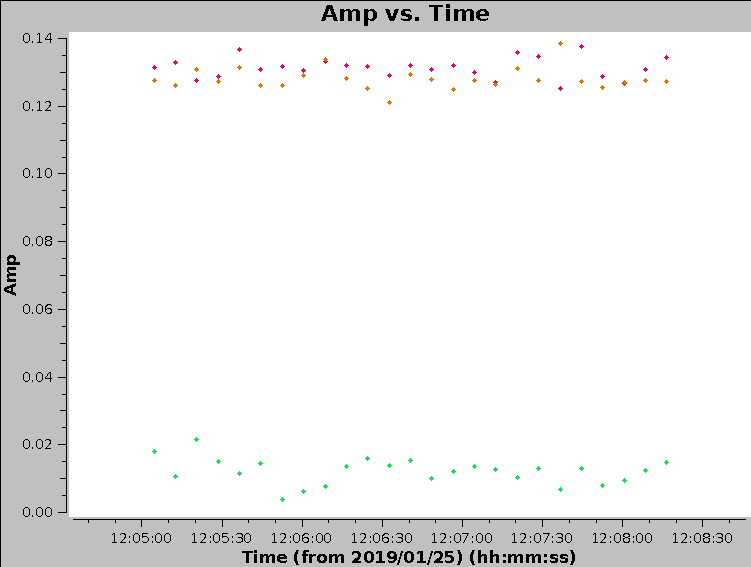

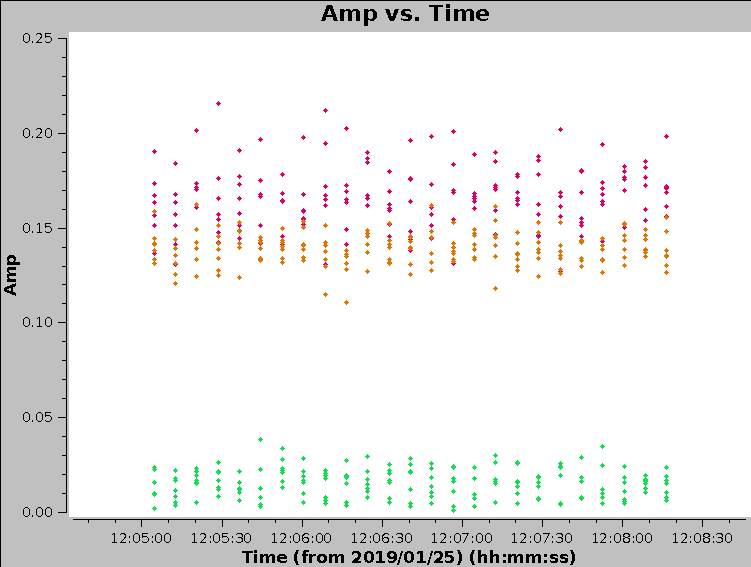

True

Show log 2019-06-20 09:40:47	INFO	plotms::::	
 2019-06-20 09:40:47	INFO	plotms::::+	##########################################
 2019-06-20 09:40:47	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:40:47	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:40:47	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:40:47	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:40:47	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:40:47	INFO	plotms::::+ antenna="",scan="",correlation="YX",array="",observation="",
 2019-06-20 09:40:47	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="1536",
 2019-06-20 09:40:47	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:40:47	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:40:47	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:40:47	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:40:47	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:40:47	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:40:47	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:40:47	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:40:47	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:40:47	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:40:47	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:40:47	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:40:47	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:40:47	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:40:48	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	START Current memory usage: 7917.91 kilobytes.
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Data Averaging: 
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ Channel: 1536 channels
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:40:48	INFO	PlotMS::load_cache	Data selection will yield a total of 150 plottable points (flagged and unflagged).
 2019-06-20 09:40:48	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 3.

In [21]:
plotms(vis=msfile, xaxis='time', yaxis='amp', correlation='YX', coloraxis='baseline', field=target, avgchannel='1536')
plotms(vis=msfile, xaxis='time', yaxis='amp', correlation='XY', coloraxis='baseline', field=target, avgchannel='128')

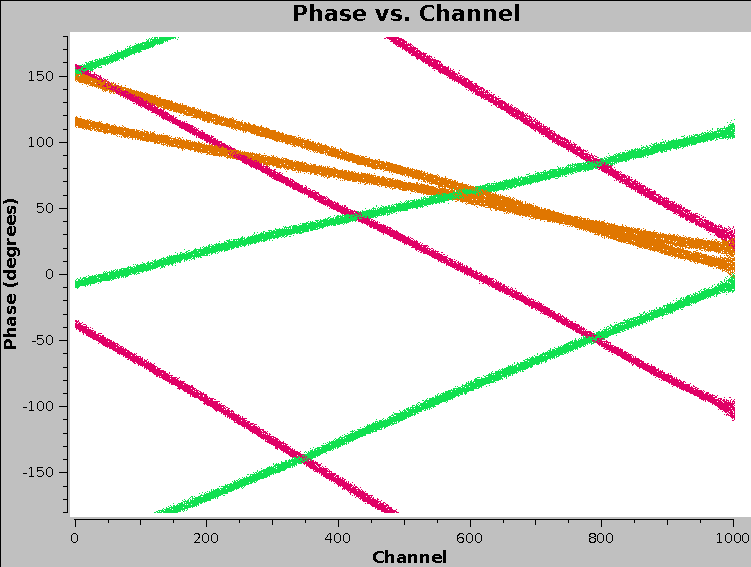

True

Show log 2019-06-20 09:40:58	INFO	plotms::::	
 2019-06-20 09:40:58	INFO	plotms::::+	##########################################
 2019-06-20 09:40:58	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:40:58	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:40:58	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:40:58	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:40:58	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:40:58	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-06-20 09:40:58	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:40:58	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:40:58	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:40:58	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:40:58	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:40:58	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:40:58	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:40:58	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:40:58	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:40:58	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:40:58	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:40:58	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:40:58	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:40:58	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:40:58	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:40:58	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	START Current memory usage: 7936.72 kilobytes.
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:40:58	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Channel(5)...
 2019-06-20 09:40:58	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:40:59	INFO	PlotMS::load_cache	Data selection will yield a total of 300300 plottable points (flagged and unflagged).
 2019-06-20 09:40:59	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0021048 GB of memory (7.00899 bytes/point).
 2019-06-20 09:40:59	INFO	PlotMS::load_cache+	This is 0.0129024

In [22]:
plotms(vis=msfile, xaxis='channel', yaxis='phase', correlation='XX,YY', field=target, coloraxis='baseline', plotrange=[0,0,-180,180])

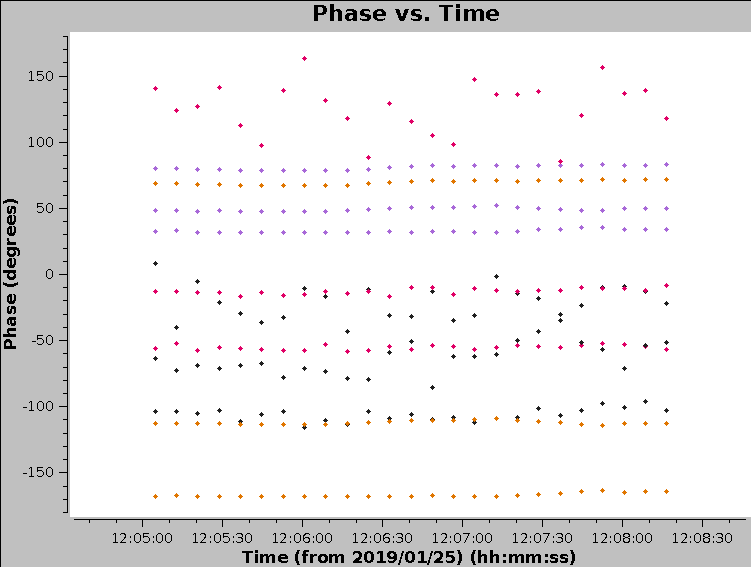

True

Show log 2019-06-20 09:41:04	INFO	plotms::::	
 2019-06-20 09:41:04	INFO	plotms::::+	##########################################
 2019-06-20 09:41:04	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:41:04	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:41:04	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:41:04	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:41:04	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:41:04	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-06-20 09:41:04	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="3072",
 2019-06-20 09:41:04	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:41:04	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:41:04	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:41:04	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:41:04	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:41:04	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:41:04	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:41:04	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:41:04	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:41:04	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:41:04	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:41:04	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:41:04	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:41:04	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:41:04	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	START Current memory usage: 7945.03 kilobytes.
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Data Averaging: 
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ Channel: 3072 channels
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Time(2)...
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:41:04	INFO	PlotMS::load_cache	Data selection will yield a total of 600 plottable points (flagged and unflagged).
 2019-06-20 09:41:04	INFO	PlotMS::load_cache+	The plotms cache will require an

In [23]:
plotms(vis=msfile, xaxis='time', yaxis='phase', field=target, coloraxis='corr', avgchannel='3072', plotrange=[0,0,-180,180])

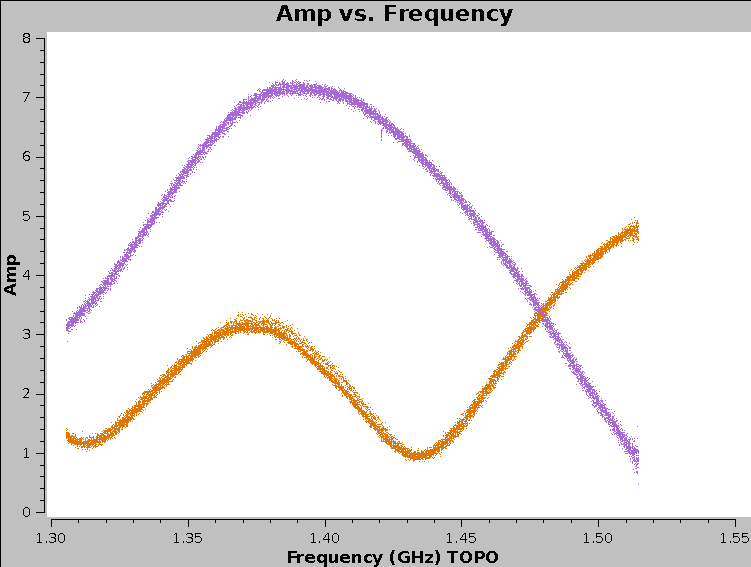

True

Show log 2019-06-20 09:41:08	INFO	plotms::::	
 2019-06-20 09:41:08	INFO	plotms::::+	##########################################
 2019-06-20 09:41:08	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:41:08	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:41:08	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:41:08	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:41:08	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:41:08	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-06-20 09:41:08	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:41:08	INFO	plotms::::+ avgtime="10",avgscan=True,avgfield=False,avgbaseline=True,avgantenna=False,
 2019-06-20 09:41:08	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:41:08	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:41:08	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:41:08	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:41:08	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:41:08	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:41:08	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:41:08	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:41:08	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:41:08	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:41:08	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:41:08	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:41:08	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:41:08	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	START Current memory usage: 7953.36 kilobytes.
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Data Averaging: 
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ Time: 10 seconds. Scan: true; Field: false
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ All Baselines: true
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:41:08	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:41:08	INFO	PlotMS::load_cache	Data selection will yield a total of 156156 plottable points (flagged and unflagged

In [24]:
plotms(vis=msfile, xaxis='frequency', yaxis='amp', correlation='XX,YY', field=target, averagedata=True, avgscan=True, avgtime='10', avgbaseline=True, coloraxis='corr')

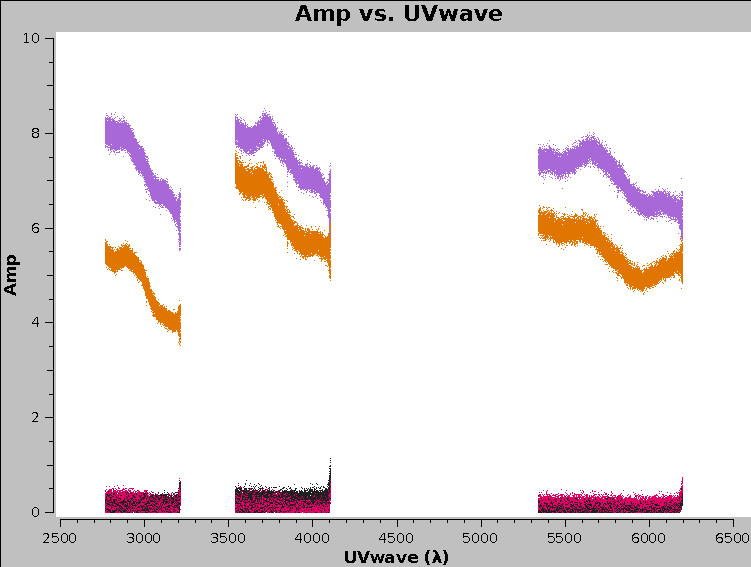

True

Show log 2019-06-20 09:41:14	INFO	plotms::::	
 2019-06-20 09:41:14	INFO	plotms::::+	##########################################
 2019-06-20 09:41:14	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:41:14	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:41:14	INFO	plotms::::+ plotindex=0,xaxis="uvwave",xdatacolumn="",xframe="",xinterp="",
 2019-06-20 09:41:14	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:41:14	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-20 09:41:14	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-06-20 09:41:14	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-20 09:41:14	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:41:14	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:41:14	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:41:14	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:41:14	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:41:14	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:41:14	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:41:14	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:41:14	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:41:14	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:41:14	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:41:14	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:41:14	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:41:14	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:41:14	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	START Current memory usage: 8531.94 kilobytes.
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. UVwave(29)...
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:41:14	INFO	PlotMS::load_cache	Data selection will yield a total of 600600 plottable points (flagged and unflagged).
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.005108 GB of memory (8.50483 bytes/point).
 2019-06-20 09:41:14	INFO	PlotMS::load_cache+	This is 0.0313119% of the memory avail. to CASA

In [25]:
plotms(vis=msfile, xaxis='uvwave', yaxis='amp', field=target, coloraxis='corr')

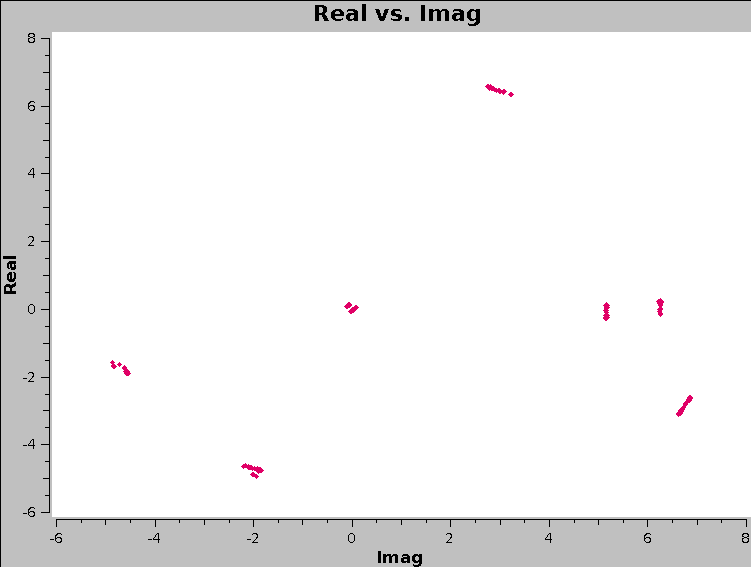

True

Show log 2019-06-20 09:41:22	INFO	plotms::::	
 2019-06-20 09:41:22	INFO	plotms::::+	##########################################
 2019-06-20 09:41:22	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-20 09:41:22	INFO	plotms::::	plotms(vis="exms_cleanband.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-20 09:41:22	INFO	plotms::::+ plotindex=0,xaxis="imag",xdatacolumn="data",xframe="",xinterp="",
 2019-06-20 09:41:22	INFO	plotms::::+ yaxis="real",ydatacolumn="data",yframe="",yinterp="",yaxislocation="",
 2019-06-20 09:41:22	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="0",timerange="",uvrange="",
 2019-06-20 09:41:22	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-06-20 09:41:22	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="512",
 2019-06-20 09:41:22	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-20 09:41:22	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-20 09:41:22	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-20 09:41:22	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-20 09:41:22	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-20 09:41:22	INFO	plotms::::+ symboloutline=False,coloraxis="scan",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-20 09:41:22	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-20 09:41:22	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-20 09:41:22	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-20 09:41:22	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-20 09:41:22	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-20 09:41:22	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-20 09:41:22	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-20 09:41:22	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-20 09:41:22	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	START Current memory usage: 8575.53 kilobytes.
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ Frame = 
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Data Averaging: 
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ Channel: 512 channels
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Caching for the new plot: Real(19):data vs. Imag(20):data...
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-20 09:41:22	INFO	PlotMS::load_cache	Data selection will yield a total of 600 plottable points (flagged and unflagged).
 2019-06-20 09:41:22	INFO	PlotMS::load_cache+	The plotms cache will require an est

In [26]:
plotms(vis=msfile, xaxis='imag', yaxis='real', field=target, spw='0', xdatacolumn='data', ydatacolumn='data', coloraxis='scan', antenna='', correlation='', avgscan=False, avgchannel='512')